# Car_Price_Prediction

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [75]:
df=pd.read_csv('car data.csv')

In [76]:
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [77]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [79]:
##for checking the missing the data 
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

<Axes: >

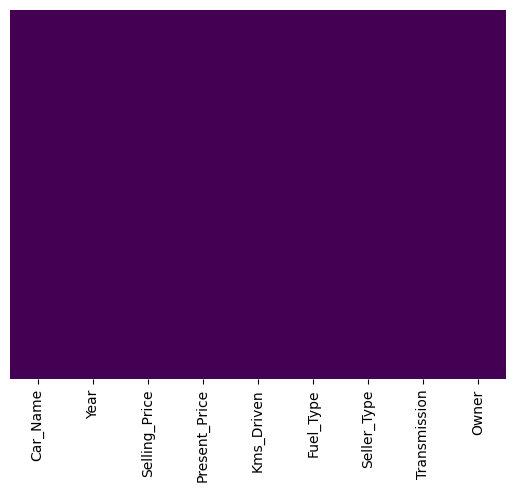

In [80]:
## if we see it in our visualization tool we use 
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [81]:
#checking the distribution the catecorical data 
print(df.Car_Name.value_counts())
print(df.Fuel_Type.value_counts())
print(df.Seller_Type.value_counts())
print(df.Transmission.value_counts())

Car_Name
city                        26
corolla altis               16
verna                       14
fortuner                    11
brio                        10
                            ..
Honda CB Trigger             1
Yamaha FZ S                  1
Bajaj Pulsar 135 LS          1
Activa 4g                    1
Bajaj Avenger Street 220     1
Name: count, Length: 98, dtype: int64
Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


In [82]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [67]:
#encoding the categorical data 

In [83]:
df.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
df.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)
df.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [84]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [18]:
#spliting the data into training data and test data 

In [85]:
X=df.drop(['Car_Name','Selling_Price'],axis=1)
y=df['Selling_Price']

In [52]:
#X=df.drop(['Selling_Price'],axis=1,inplace=True)

In [86]:
print(X)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [87]:
y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

In [88]:
#spliting the traning and test data 

In [89]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=2)

In [90]:
#training data
X_train

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
204,2015,4.430,28282,0,0,0,0
249,2016,7.600,17000,0,0,0,0
277,2015,13.600,21780,0,0,0,0
194,2008,0.787,50000,0,1,0,0
244,2013,9.400,49000,1,0,0,0
...,...,...,...,...,...,...,...
75,2015,6.800,36000,0,0,0,0
22,2011,8.010,50000,0,0,1,0
72,2013,18.610,56001,0,0,0,0
15,2016,10.790,43000,1,0,0,0


In [91]:
#test data 
X_test

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
99,2010,20.450,50024,1,0,0,0
161,2014,0.826,23000,0,1,0,0
89,2014,6.760,40000,0,0,0,0
30,2012,5.980,51439,1,0,0,0
232,2015,14.790,12900,0,0,1,0
290,2014,6.400,19000,0,0,0,0
35,2011,7.740,49998,2,0,0,0
7,2015,8.610,33429,1,0,0,0
183,2013,0.470,21000,0,1,0,0
13,2015,7.710,26000,0,0,0,0


In [92]:
y_train

204    2.75
249    5.25
277    9.70
194    0.20
244    5.95
       ... 
75     3.95
22     4.40
72     7.45
15     7.75
168    0.42
Name: Selling_Price, Length: 270, dtype: float64

In [93]:
y_test

99      9.65
161     0.45
89      4.75
30      3.10
232    11.45
290     4.50
35      2.95
7       6.50
183     0.27
13      6.10
269     6.70
65      4.75
178     0.35
258     8.40
227     2.55
133     0.72
130     0.75
156     0.48
237    11.25
262     4.00
112     1.15
282     8.25
164     0.45
275    10.90
154     0.50
29      7.45
141     0.60
192     0.20
216     2.90
3       2.85
159     0.45
Name: Selling_Price, dtype: float64

MODEL TRAINING

In [94]:
regressor=LinearRegression()

In [95]:
regressor.fit(X_train,y_train)

LinearRegression()

In [97]:
##model evaluation, prediction on training data


In [98]:
training_data_prediction = regressor.predict(X_train)

In [100]:
training_data_prediction

array([ 3.73088505e+00,  5.60702081e+00,  7.79779356e+00, -1.88374756e+00,
        6.71614572e+00,  8.14343296e+00,  5.84067525e+00,  6.17919527e+00,
        6.15863751e+00,  1.59459051e+01,  2.15385926e+00,  1.11618544e+00,
       -4.05463414e-01,  6.69051516e+00,  6.81961414e+00,  1.02957394e+00,
        6.74306974e+00,  1.43864300e+01,  3.00001893e+00,  7.95149024e+00,
       -8.38569413e-01,  9.02067892e+00,  1.21210550e+00,  2.20040027e+00,
       -8.23744275e-01,  7.52651502e-01,  1.00142469e+01, -4.08950275e-01,
       -2.40418357e+00,  9.99845989e+00,  6.81867179e+00,  1.09249928e+00,
        4.36158792e+00,  9.20660480e-02,  3.48993776e+00,  2.78147834e+00,
        1.50401026e+00,  4.65736158e-01,  1.68679810e+00,  1.18722506e+00,
        4.32936153e+00,  6.09932798e+00,  9.51639926e-01,  7.52875828e-01,
        6.05967594e+00,  3.49453005e+00,  2.40969246e+00,  7.52230513e+00,
        4.63113915e+00,  4.44239322e+00,  4.22460259e+00,  2.71077171e+00,
        4.46881874e+00,  

In [101]:
y_train

204    2.75
249    5.25
277    9.70
194    0.20
244    5.95
       ... 
75     3.95
22     4.40
72     7.45
15     7.75
168    0.42
Name: Selling_Price, Length: 270, dtype: float64

In [99]:
#R squared Error
error_score = metrics.r2_score(y_train,training_data_prediction)
print(error_score)

0.8799451660493705


In [102]:
#Visualize the actual and predicted prices

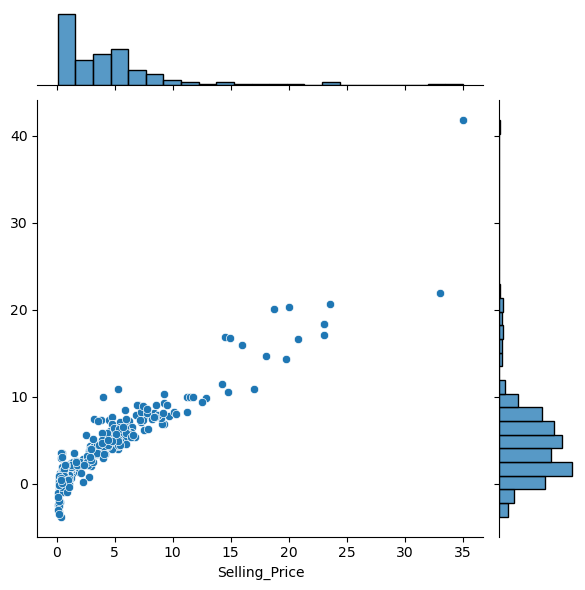

In [104]:
sns.jointplot(x=y_train,y=training_data_prediction)

In [105]:
#now prediction on test data
test_data_prediction=regressor.predict(X_test)

In [106]:
test_data_prediction

array([10.32892855,  0.77165673,  4.26482324,  4.78985002,  9.88701568,
        4.24823193,  6.92536953,  7.29321065,  0.21950514,  5.18527582,
        6.23823964,  6.07761019,  2.1716932 ,  7.77611973,  1.89987958,
        1.79635895,  2.10001123,  1.91953211,  9.24977006,  4.25291486,
        1.569912  ,  9.04949049,  1.52561157,  9.65418587,  0.89631315,
        7.99187626,  1.59929505, -3.17680912,  4.24653988,  2.1257015 ,
        3.49654935])

In [108]:
y_test

99      9.65
161     0.45
89      4.75
30      3.10
232    11.45
290     4.50
35      2.95
7       6.50
183     0.27
13      6.10
269     6.70
65      4.75
178     0.35
258     8.40
227     2.55
133     0.72
130     0.75
156     0.48
237    11.25
262     4.00
112     1.15
282     8.25
164     0.45
275    10.90
154     0.50
29      7.45
141     0.60
192     0.20
216     2.90
3       2.85
159     0.45
Name: Selling_Price, dtype: float64

In [109]:
#R squared Error
error_score = metrics.r2_score(y_test,test_data_prediction)
print(error_score)

0.836576671502687


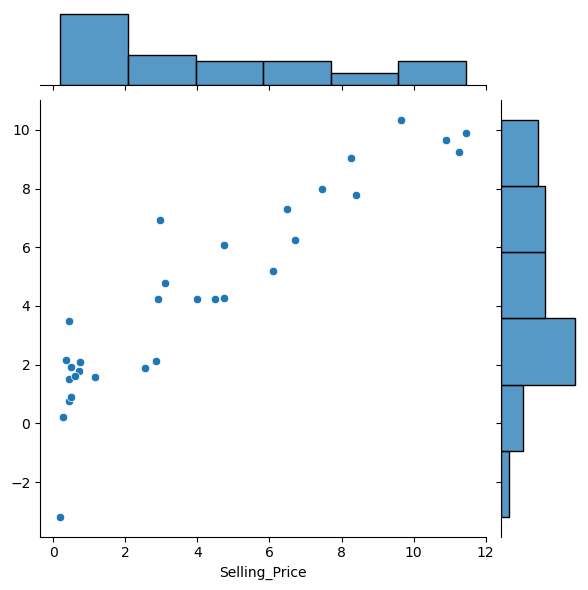

In [110]:
sns.jointplot(x=y_test,y=test_data_prediction)

In [111]:
##LASSO REGRESSION

In [114]:
las_reg_model=Lasso()
las_reg_model.fit(X_train,y_train)

<IPython.core.display.Javascript object>

Lasso()

In [115]:
training_data_prediction=las_reg_model.predict(X_train)

In [116]:
training_data_prediction

array([ 3.56679076e+00,  5.60257564e+00,  8.28781371e+00, -8.30814314e-01,
        5.27539880e+00,  6.50367937e+00,  5.73552938e+00,  6.41187200e+00,
        4.78218845e+00,  1.54979701e+01,  2.60868685e+00,  1.68164537e+00,
        4.65587149e-01,  5.14260426e+00,  6.87569869e+00,  1.60372469e+00,
        5.30299396e+00,  1.39150016e+01,  2.86877663e+00,  6.44421824e+00,
        9.38523430e-02,  9.99955865e+00,  1.79683394e+00,  2.66121014e+00,
        2.10269105e-02,  1.39327221e+00,  1.01152846e+01,  4.55985698e-01,
       -1.29850564e+00,  8.96458834e+00,  6.87473286e+00,  2.80689227e+00,
        4.00679563e+00,  8.93707044e-01,  3.11243615e+00,  2.61344453e+00,
        2.13519495e+00,  1.21115483e+00,  2.20395877e+00,  1.77253883e+00,
        4.40123646e+00,  4.26379158e+00,  1.53108120e+00,  2.67410546e+00,
        4.37186991e+00,  2.41613935e+00,  2.90706331e+00,  6.07491388e+00,
        5.02364608e+00,  4.39669701e+00,  3.59203190e+00,  2.67643327e+00,
        4.41172590e+00,  

In [118]:
y_train

204    2.75
249    5.25
277    9.70
194    0.20
244    5.95
       ... 
75     3.95
22     4.40
72     7.45
15     7.75
168    0.42
Name: Selling_Price, Length: 270, dtype: float64

In [119]:
# R SQUARED ERROR
err=metrics.r2_score(y_train,training_data_prediction)

In [120]:
print(err)

0.8427856123435794


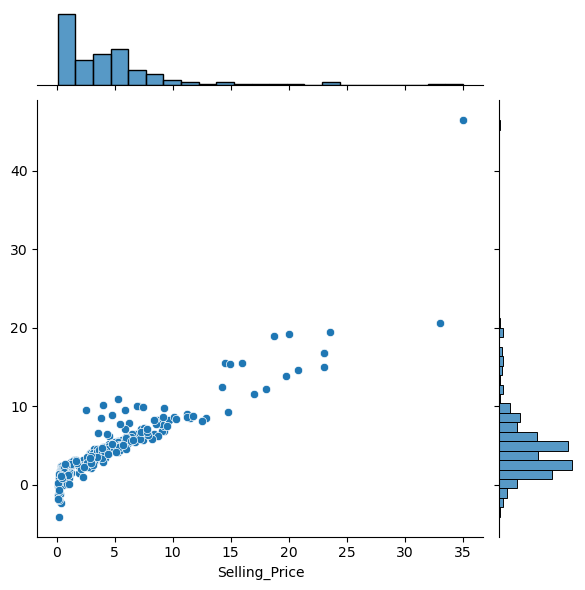

In [121]:
sns.jointplot(x=y_train,y=training_data_prediction)

In [123]:
test_data_prediction=las_reg_model.predict(X_test)

In [124]:
test_data_prediction

array([ 9.87888122,  1.42396266,  4.33267834,  3.17313445,  8.95590579,
        4.29397384,  3.73913632,  5.66283974,  0.91478394,  5.25514316,
        6.47238818,  4.39507335,  1.2955156 ,  8.26559961,  2.00292338,
        2.32529219,  2.55349653,  2.34742172,  7.96895166,  4.18441245,
        2.3369918 ,  7.86598537,  2.02308236,  8.56734786,  1.55498136,
        6.48561097,  2.11427451, -1.18422036,  4.01710445,  2.21749695,
        2.41820898])

In [125]:
y_test

99      9.65
161     0.45
89      4.75
30      3.10
232    11.45
290     4.50
35      2.95
7       6.50
183     0.27
13      6.10
269     6.70
65      4.75
178     0.35
258     8.40
227     2.55
133     0.72
130     0.75
156     0.48
237    11.25
262     4.00
112     1.15
282     8.25
164     0.45
275    10.90
154     0.50
29      7.45
141     0.60
192     0.20
216     2.90
3       2.85
159     0.45
Name: Selling_Price, dtype: float64

In [126]:
## check for R squared value to compare
err=metrics.r2_score(y_test,test_data_prediction)

In [127]:
err

0.8709167941173195

In [128]:
## for visualization in actual and predicted test data 

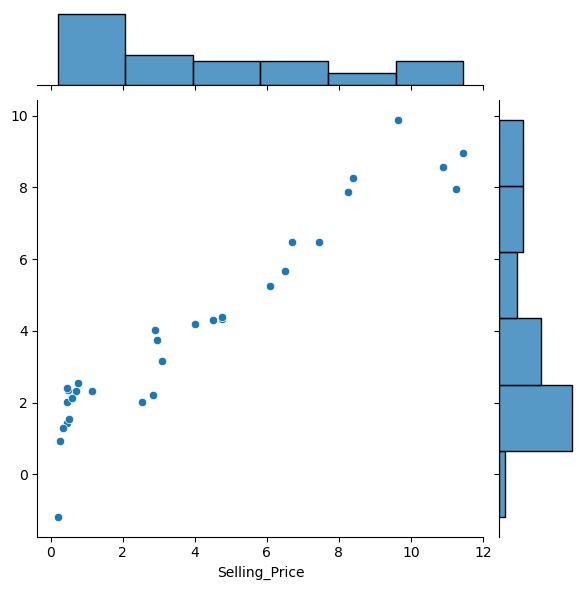

In [129]:
sns.jointplot(x=y_test,y=test_data_prediction)